In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv', header=None)

In [3]:
df.head(5)

,0,1,2,3,4,5
0,2024-05-24,10178,154,69956,1.0,95.0
1,2024-05-24,10178,151,57768,1.0,150.0
2,2024-05-24,10178,151,57768,1.0,150.0
3,2024-05-24,10178,151,57768,1.0,150.0
4,2024-05-24,10178,151,57768,3.0,450.0


In [4]:
df.columns = ['date', 'outlet_id', 'Sub_cat_id', 'Item_code', 'Quantity', 'Price']


In [5]:
df.head(5)

,date,outlet_id,Sub_cat_id,Item_code,Quantity,Price
0,2024-05-24,10178,154,69956,1.0,95.0
1,2024-05-24,10178,151,57768,1.0,150.0
2,2024-05-24,10178,151,57768,1.0,150.0
3,2024-05-24,10178,151,57768,1.0,150.0
4,2024-05-24,10178,151,57768,3.0,450.0


In [6]:
print(df.isnull().sum())

date          0
outlet_id     0
Sub_cat_id    0
Item_code     0
Quantity      0
Price         0
dtype: int64


In [7]:
df = df.dropna()

In [8]:
# Remove rows where 'quantity' is 0
df = df[df['Quantity'] != 0]

# Verify the rows with 'quantity' 0 are removed
print(df)


               date  outlet_id  Sub_cat_id  Item_code  Quantity   Price
0        2024-05-24      10178         154      69956       1.0   95.00
1        2024-05-24      10178         151      57768       1.0  150.00
2        2024-05-24      10178         151      57768       1.0  150.00
3        2024-05-24      10178         151      57768       1.0  150.00
4        2024-05-24      10178         151      57768       3.0  450.00
...             ...        ...         ...        ...       ...     ...
1526217  2024-06-14      10243         130      69017       2.0  114.00
1526218  2024-06-14      10223         188      58288      15.0  780.00
1526219  2024-06-14      10243         202      58231       3.0   30.00
1526220  2024-06-14      10255         154      70172       2.0   96.00
1526221  2024-06-13      10272         197   15554109       1.0  474.35

[1518944 rows x 6 columns]


In [9]:
print(df.isnull().sum())

date          0
outlet_id     0
Sub_cat_id    0
Item_code     0
Quantity      0
Price         0
dtype: int64


In [10]:
# Display the top 20 rows with the highest prices
top_20_prices = df.nlargest(20, 'Price')
print(top_20_prices)


               date  outlet_id  Sub_cat_id  Item_code  Quantity       Price
1236681  2024-04-08      10178          79      69857    3200.0  1048000.00
1236643  2024-03-31      10252          79      70289    2405.0  1005290.00
1233737  2023-09-10      10177          47      69567    8421.7   432875.38
1235642  2023-12-31      10266         145      58009   12370.0   352545.00
1235701  2024-01-30      10267          50      69169     460.0   286120.00
1229830  2022-09-09      10247         197      58711    1350.0   250087.50
1441968  2024-05-23      10257          68      58601   39250.0   202137.50
1236028  2024-02-13      10244         197      57518     170.0   141950.00
1235796  2024-01-29      10224          74      69896     220.0   141680.00
1234977  2023-11-02      10224          74      69896     200.0   128800.00
1235412  2023-12-24      10224          74      69896     200.0   128800.00
1466477  2024-07-31      10224          74      69896     200.0   128800.00
1231376  202

In [11]:
# Remove rows where 'quantity' is more than 100
df = df[df['Quantity'] <= 100]


In [12]:
# Remove rows where 'price' is more than 30,000
df = df[df['Price'] <= 30000]


In [13]:
# Remove rows where 'quantity' is less than 0
df = df[df['Quantity'] >= 0]


In [14]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])


In [15]:
# Descriptive statistics
print(df.describe())


                                date     outlet_id    Sub_cat_id  \
count                        1513539  1.513539e+06  1.513539e+06   
mean   2023-12-23 01:42:57.826141184  1.023017e+04  1.557782e+02   
min              2022-06-01 00:00:00  1.017700e+04  3.200000e+01   
25%              2023-09-12 00:00:00  1.021600e+04  1.460000e+02   
50%              2023-12-18 00:00:00  1.022300e+04  1.620000e+02   
75%              2024-04-07 00:00:00  1.025700e+04  1.980000e+02   
max              2024-08-04 00:00:00  1.027200e+04  2.160000e+02   
std                              NaN  2.901623e+01  5.006976e+01   

          Item_code      Quantity         Price  
count  1.513539e+06  1.513539e+06  1.513539e+06  
mean   6.846096e+04  2.533153e+00  2.335392e+02  
min    5.538200e+04  1.000000e-04  0.000000e+00  
25%    5.787600e+04  1.000000e+00  5.500000e+01  
50%    5.869000e+04  1.000000e+00  1.200000e+02  
75%    6.941600e+04  1.550000e+00  2.200000e+02  
max    1.555499e+07  1.000000e+02  2.

D:\Python311\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


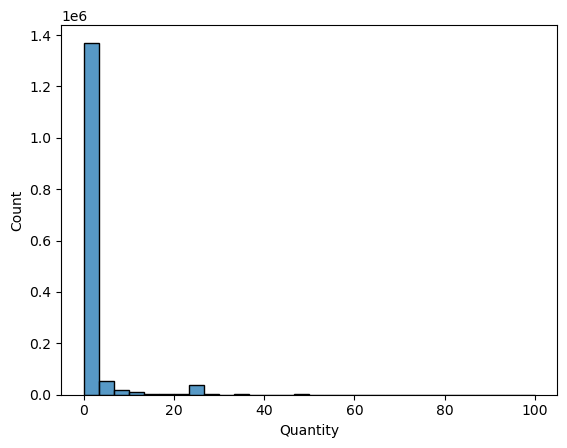

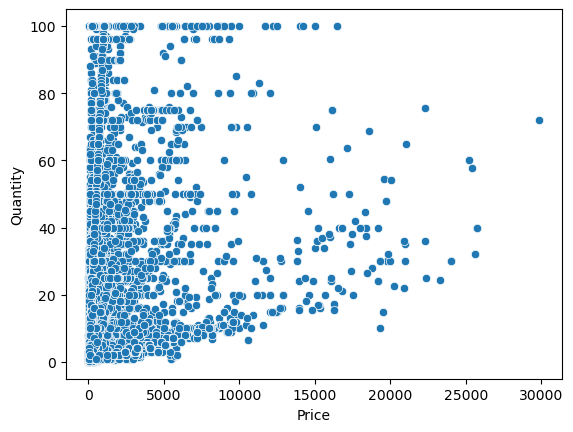

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Quantity distribution
sns.histplot(df['Quantity'], bins=30)
plt.show()

# Relationship between Price and Quantity
sns.scatterplot(x='Price', y='Quantity', data=df)
plt.show()


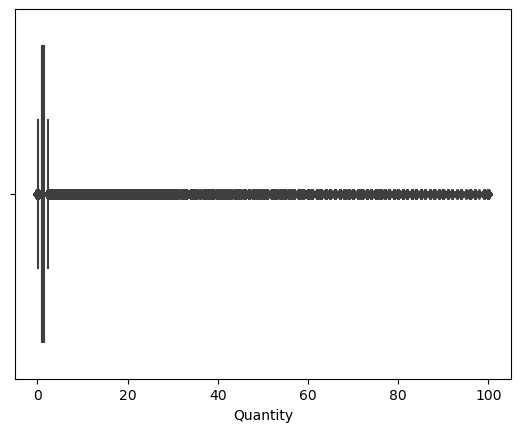

In [17]:
sns.boxplot(x=df['Quantity'])
plt.show()

In [18]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['date'].dt.dayofweek >= 5
df = df.drop(['date'], axis=1)


In [19]:
X = df.drop(['Quantity'], axis=1)
y = df['Quantity']


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


In [ ]:
import pandas as pd
from itertools import product
from datetime import timedelta

# Generate future dates for the next 7 days
future_dates = pd.date_range(start=pd.to_datetime('today'), periods=7)
future_dates = pd.DataFrame({'date': future_dates})

# Get unique values for outlet_id, Item_code, and Sub_cat_id
outlet_ids = df['outlet_id'].unique()
item_codes = df['Item_code'].unique()
sub_cat_ids = df['Sub_cat_id'].unique()

# Create all combinations of outlet_id, Item_code, Sub_cat_id for each date
combinations = list(product(outlet_ids, sub_cat_ids, item_codes, future_dates['date']))

# Convert combinations to DataFrame
future_data = pd.DataFrame(combinations, columns=['outlet_id', 'Sub_cat_id', 'Item_code', 'date'])

# Extract date-related features
future_data['year'] = future_data['date'].dt.year
future_data['month'] = future_data['date'].dt.month
future_data['day'] = future_data['date'].dt.day
future_data['day_of_week'] = future_data['date'].dt.dayofweek
future_data['is_weekend'] = future_data['date'].dt.dayofweek >= 5

# Drop the date column as it is not needed for prediction
future_data = future_data.drop(['date'], axis=1)

# Assume a constant price (mean of the Price column)
future_data['Price'] = df['Price'].mean()

# Predict future demand
# Ensure your Random Forest model is trained to handle these features:
# ['outlet_id', 'Sub_cat_id', 'Item_code', 'year', 'month', 'day', 'day_of_week', 'is_weekend', 'Price']
future_predictions = rf.predict(future_data)
future_data['predicted_quantity'] = future_predictions

# Display the future data with predictions
print(future_data)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
